<a href="https://colab.research.google.com/github/awaiskhan005/DATA-SCIENCE-AND-AI-/blob/main/kyphosis%20SUPPORT%20VECTOR%20MACHINE%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import *
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('/content/sample_data/kyphosis.csv')
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
df.isnull().sum()

Kyphosis    0
Age         0
Number      0
Start       0
dtype: int64

In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


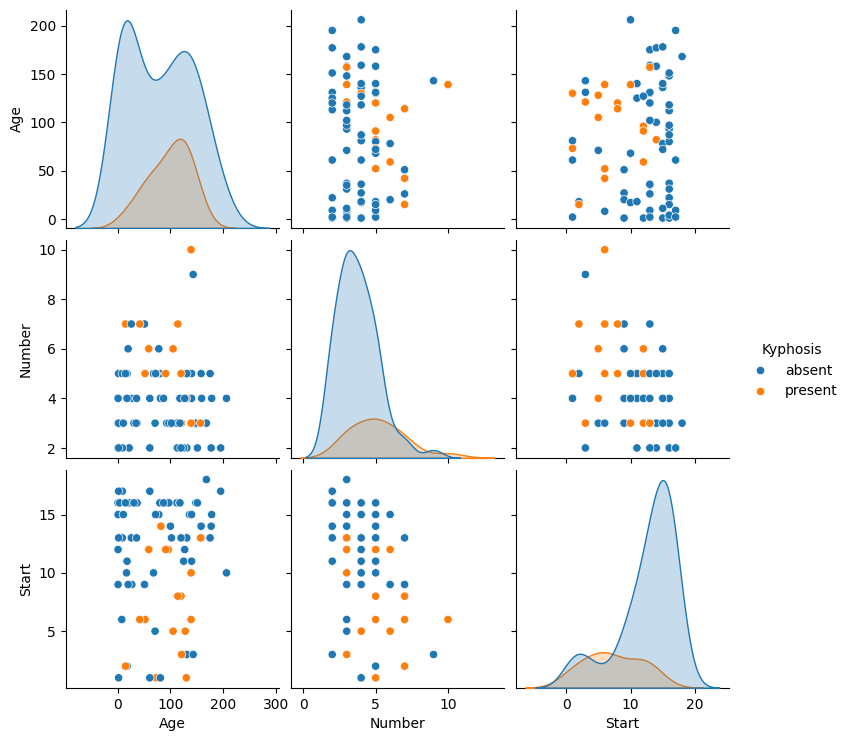

In [7]:
sns.pairplot(df, hue="Kyphosis")

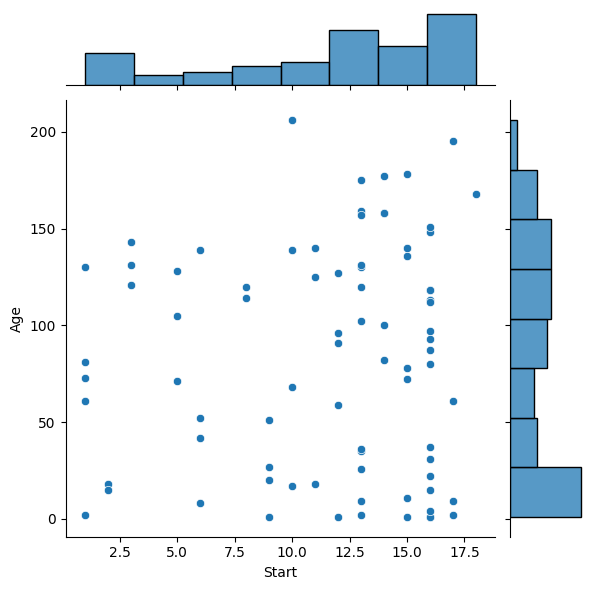

In [8]:
sns.jointplot(data=df, x='Start', y="Age")


In [9]:


import plotly.express as px

fig = px.scatter(df, x="Start", y="Age", color="Kyphosis", title="Kyphosis Plot")
fig.show()


In [10]:
x = df[['Age', 'Number', 'Start']]
y = df['Kyphosis']

In [11]:
# prompt: split x trai a nd y train

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [12]:
# prompt: print shape of all

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(64, 3) (17, 3) (64,) (17,)


In [13]:

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)




RandomForestClassifier()

In [14]:
# prompt: print accuracy score

from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))


Accuracy score: 0.8235294117647058


In [15]:
# prompt: print confusion matrxi

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confusion_matrix)


[[14  0]
 [ 3  0]]


In [16]:
# prompt: classification report

print(metrics.classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

      absent       0.82      1.00      0.90        14
     present       0.00      0.00      0.00         3

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [17]:
# prompt: make a plot for predicted vs actual using  plotly

fig = px.scatter(x=y_test, y=y_pred, title="Actual vs Predicted Kyphosis")
fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.add_shape(type='line',
                x0=0, y0=0,
                x1=1, y1=1,
                line=dict(color='MediumPurple', width=3))
fig.update_layout(
    xaxis_title='Actual Kyphosis',
    yaxis_title='Predicted Kyphosis',
    margin=dict(l=40, r=40, t=40, b=40),
)
fig.show()


In [18]:
# prompt: make a confusion  matrix plot using pltoy

import plotly.graph_objects as go

labels = ['Absent', 'Present']
confusion_matrix = [[10, 2], [3, 8]]

fig = go.Figure(data=go.Heatmap(
    x=labels,
    y=labels,
    z=confusion_matrix,
    colorscale='Viridis',
    text=confusion_matrix,
    texttemplate='%{text}',
    hoverinfo='text'
))

fig.update_layout(
    title='Confusion Matrix',
    xaxis_title='Predicted',
    yaxis_title='True',
)

fig.show()


In [54]:
# prompt: make a randon data of students marks  and make last coloumn of the student will either pass or fail size should be 2000 instances and 20 features

import pandas as pd
import numpy as np

# Create a list of 20 random features
features = ['Feature ' + str(i) for i in range(1, 21)]

# Create a list of 2000 random student IDs
student_ids = np.random.randint(100000, 999999, size=2000)

# Create a list of 2000 random marks between 0 and 100
marks = np.random.randint(0, 101, size=2000)

# Create a list of 2000 random pass/fail values
pass_fail = np.random.choice(['Pass', 'Fail'], size=2000)

# Create a DataFrame with the student IDs, features, marks, and pass/fail values
df = pd.DataFrame({'Student ID': student_ids, **{feature: np.random.randint(0, 101, size=2000) for feature in features}, 'Marks': marks, 'Pass/Fail': pass_fail})

# Display the DataFrame
print(df.head())


   Student ID  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0      436613         14         99         70          0         96   
1      598962          8         50         94         49         97   
2      530564          4          1         60         49         97   
3      222033         90         32         37         77         15   
4      581619          8         53         95         75         31   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 13  Feature 14  \
0         67         12         25         16  ...          52          32   
1         67         96         70         87  ...          83           6   
2         27         94         27         58  ...          69           4   
3         95         47         20         86  ...          10          65   
4         33         43         65         88  ...          81          40   

   Feature 15  Feature 16  Feature 17  Feature 18  Feature 19  Feature 20  \
0          98        

In [55]:
df

,Student ID,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Marks,Pass/Fail
0,436613,14,99,70,0,96,67,12,25,16,...,52,32,98,76,78,20,81,15,73,Fail
1,598962,8,50,94,49,97,67,96,70,87,...,83,6,98,92,96,72,3,93,88,Pass
2,530564,4,1,60,49,97,27,94,27,58,...,69,4,86,92,90,0,63,53,5,Fail
3,222033,90,32,37,77,15,95,47,20,86,...,10,65,14,78,91,53,52,44,86,Fail
4,581619,8,53,95,75,31,33,43,65,88,...,81,40,67,87,84,100,92,83,76,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,482260,92,100,89,82,7,60,31,4,82,...,88,95,5,48,45,37,86,37,92,Pass
1996,605833,82,77,62,9,91,20,72,99,59,...,28,70,19,74,45,22,83,59,44,Pass
1997,833597,50,9,65,96,21,92,45,6,35,...,39,87,24,91,61,24,68,48,41,Fail
1998,488114,58,47,39,59,86,7,84,16,95,...,34,17,62,42,65,49,19,35,14,Fail


In [22]:
import numpy as np
import pandas as pd

In [56]:
df.head()

,Student ID,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Marks,Pass/Fail
0,436613,14,99,70,0,96,67,12,25,16,...,52,32,98,76,78,20,81,15,73,Fail
1,598962,8,50,94,49,97,67,96,70,87,...,83,6,98,92,96,72,3,93,88,Pass
2,530564,4,1,60,49,97,27,94,27,58,...,69,4,86,92,90,0,63,53,5,Fail
3,222033,90,32,37,77,15,95,47,20,86,...,10,65,14,78,91,53,52,44,86,Fail
4,581619,8,53,95,75,31,33,43,65,88,...,81,40,67,87,84,100,92,83,76,Pass


In [58]:
# prompt: train the test daata

X = df.drop('Pass/Fail', axis=1)
y = df['Pass/Fail']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [59]:
X_test

,Student ID,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6,Feature 7,Feature 8,Feature 9,...,Feature 12,Feature 13,Feature 14,Feature 15,Feature 16,Feature 17,Feature 18,Feature 19,Feature 20,Marks
1860,780979,83,62,86,64,17,36,10,18,0,...,1,50,83,57,66,15,9,78,100,7
353,387081,60,1,98,22,36,73,54,0,52,...,74,77,72,2,41,27,92,28,98,72
1333,916041,40,17,82,11,24,6,12,87,33,...,28,29,2,28,87,94,55,30,48,33
905,259371,97,71,12,74,96,16,34,79,18,...,47,3,66,82,44,79,69,95,37,25
1289,984880,9,90,72,18,4,70,95,1,100,...,33,74,13,81,3,12,89,55,46,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,565780,51,43,96,86,82,40,46,13,13,...,85,52,69,23,38,32,49,78,9,59
1284,948021,52,97,63,57,26,38,27,50,73,...,93,68,88,16,73,12,29,46,57,23
1739,772546,39,65,38,8,51,63,3,34,24,...,63,49,2,1,29,85,12,39,60,78
261,312203,41,34,63,80,19,9,27,42,41,...,83,79,12,78,35,67,92,69,100,51


In [62]:
y_test

1860    Fail
353     Fail
1333    Pass
905     Pass
1289    Pass
        ... 
965     Pass
1284    Pass
1739    Fail
261     Fail
535     Pass
Name: Pass/Fail, Length: 400, dtype: object

In [60]:
# prompt: put svm on data

from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, y_pred))


Accuracy score: 0.505


In [61]:
# prompt: print confusion matrix

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))


[[ 81 126]
 [ 72 121]]


<Axes: >

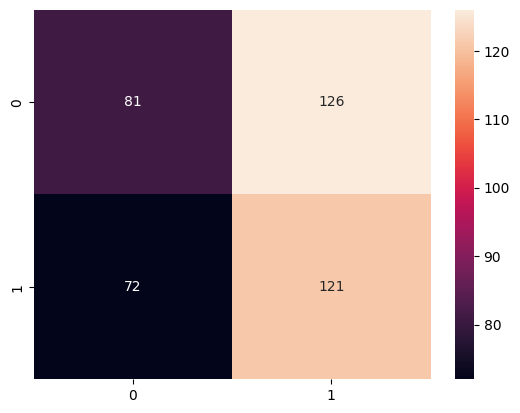

In [63]:
# prompt: make a confusion matrix plot sns

sns.heatmap(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred), annot=True, fmt="d")


In [64]:
# prompt: print classification report

print(metrics.classification_report(y_true=y_test, y_pred=y_pred))


              precision    recall  f1-score   support

        Fail       0.53      0.39      0.45       207
        Pass       0.49      0.63      0.55       193

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.50       400
weighted avg       0.51      0.51      0.50       400

